In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [7]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud))*100

print("No. of genuine transaction : ",non_fraud)
print("No. of fraud transcation :",fraud)
print("Percentage of fraud transaction :{:.4f}",format(fraud_percent))

No. of genuine transaction :  284315
No. of fraud transcation : 492
Percentage of fraud transaction :{:.4f} 0.1727485630620034


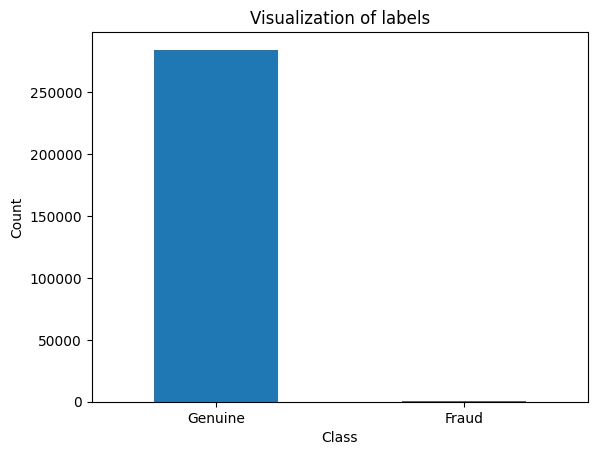

In [10]:
import matplotlib.pyplot as plt
labels = ['Genuine', 'Fraud']
count_classes = df.value_counts(df['Class'], sort=True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df.drop(["Amount","Time"], inplace = True, axis=1)
Y = df["Class"]
X = df.drop(["Class"], axis=1)

In [15]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size=0.3, random_state =42)
print("shape of train_X :",train_X.shape)
print("shape of test_X :",test_X.shape)

shape of train_X : (199364, 29)
shape of test_X : (85443, 29)


In [18]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)

decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y)*100

In [20]:
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y)*100

In [21]:
print("Random Forest Score:",random_forest_score)
print("Decision Tree Score:",decision_tree_score)

Random Forest Score: 99.96605924417447
Decision Tree Score: 99.92977774656788


Confusion Matrix - Decision Tree
[[85271    36]
 [   24   112]]


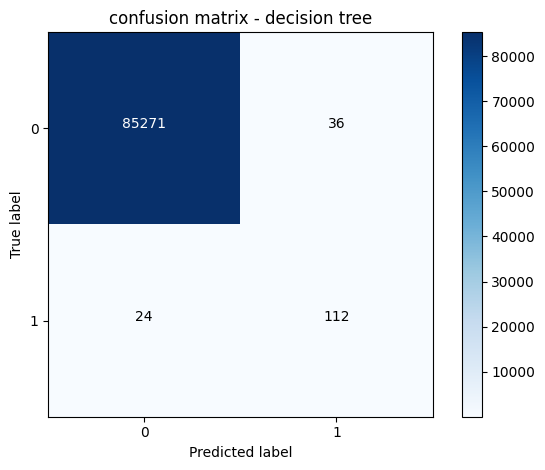

In [33]:

def metrics(actuals, predictions):
  print("Accuracy : {:.5f}",format(accuracy_score(actuals, predictions)))
  print("Precision : {:.5f}",format(precision_score(actuals, predictions)))
  print("Recall : {:.5f}",format(recall_score(actuals, predictions)))
  print("F-1 score : {:.5f}",format(f1_score(actuals, predictions)))

def plot_confusion_matrix(cm, classes, title):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)
plot_confusion_matrix(confusion_matrix_dt, classes = [0,1], title = "confusion matrix - decision tree")

In [39]:
print("Evaluaton of Decison tree model")
metrics(test_Y, predictions_dt.round())

Evaluaton of Decison tree model
Accuracy : {:.5f} 0.9992977774656788
Precision : {:.5f} 0.7567567567567568
Recall : {:.5f} 0.8235294117647058
F-1 score : {:.5f} 0.7887323943661971


confusion matrix - random forest
[[85302     5]
 [   24   112]]


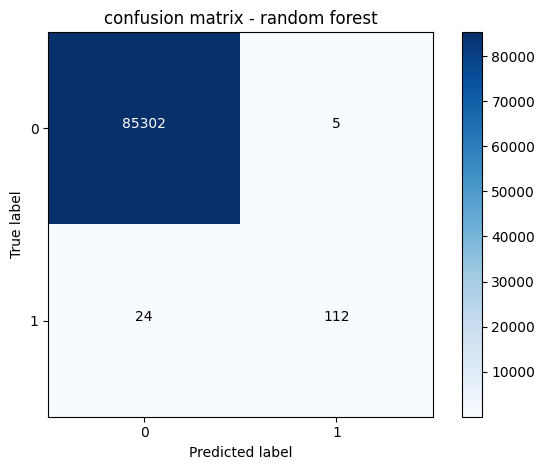

In [37]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("confusion matrix - random forest")
print(confusion_matrix_rf)
plot_confusion_matrix(confusion_matrix_rf, classes = [0,1], title = "confusion matrix - random forest")

In [38]:
print("Evaluation of Random forest model")
metrics(test_Y, predictions_rf.round())

Evaluation of Random forest model
Accuracy : {:.5f} 0.9996605924417448
Precision : {:.5f} 0.9572649572649573
Recall : {:.5f} 0.8235294117647058
F-1 score : {:.5f} 0.8853754940711462


In [42]:
from imblearn.over_sampling import SMOTE
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X:",X_resampled.shape)
print("Resampled shape of Y:",Y_resampled.shape)
value_counts = Counter(Y_resampled)
print(value_counts)
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

Resampled shape of X: (568630, 29)
Resampled shape of Y: (568630,)
Counter({0: 284315, 1: 284315})


In [47]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y)*100

cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Confusion matrix - Random forest")
print(cm_resampled)

Confusion matrix - Random forest
[[85130    19]
 [    2 85438]]


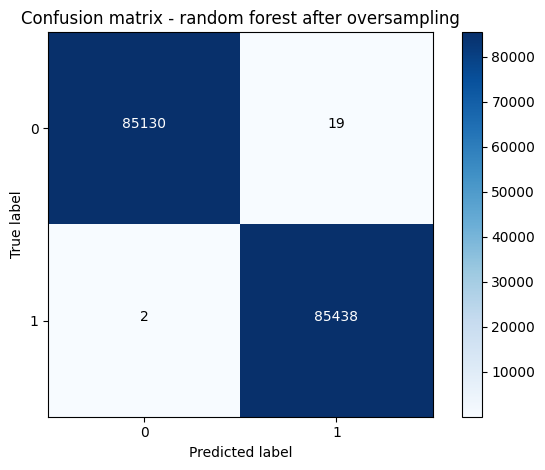

In [48]:
plot_confusion_matrix(cm_resampled, classes = [0,1], title= "Confusion matrix - random forest after oversampling")

In [49]:
print("evaluationo of random forest model")
metrics(test_Y, predictions_resampled.round())

evaluationo of random forest model
Accuracy : {:.5f} 0.9998768971035648
Precision : {:.5f} 0.9997776659606585
Recall : {:.5f} 0.9999765917602996
F-1 score : {:.5f} 0.999877118966395
